This code is designed to import and display the GLM data from GLM_DisplayTest

In [2]:
#import resources

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import cartopy.feature as cfeature
import cartopy.mpl as cmpl

In [3]:
#import netCDF file
nc_file = nc.Dataset('/Users/KevinThiel/Grad_School/GLM_DisplayTestData/GLM_HWT/IXTR98_NSSL_s20180728195000_e20180728195100_1MIN','r')

In [4]:
#makes the variable from the netCDF file into a local variable that we can use when plotting data
Average_flash_area = nc_file.variables['Average_flash_area'][::1]
x = nc_file.variables['x'][:]
y = nc_file.variables['y'][:]

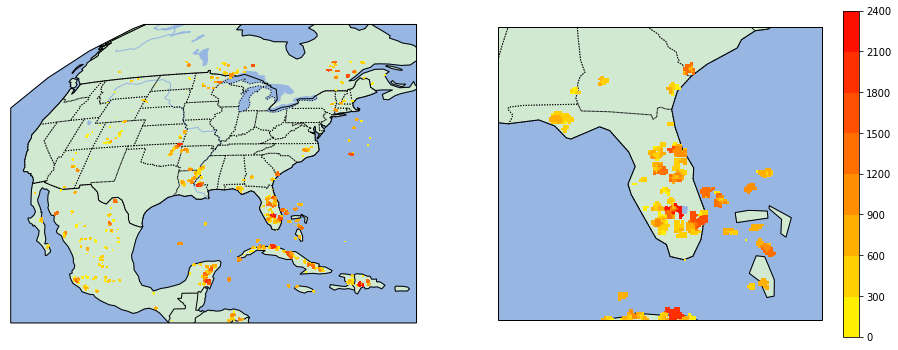

In [6]:
#creating plot with all the features
fig = plt.figure(figsize=(16, 6))
#plt.axes(projection=ccrs.Geostationary(-75, 35786023.0))
#ax.set_extent([-113, -75, 15, 52])
#plt.contourf(x * 35786023.0, y * 35786023.0, Average_flash_area, cmap=plt.get_cmap('autumn_r'), zorder=10)
#plt.title('GLM Average_flash_area 7-28-2018')


ax1 = plt.subplot(1, 2, 1, projection=ccrs.Geostationary(-75, 35786023.0))
ax1.contourf(x * 35786023.0, y * 35786023.0, Average_flash_area, cmap=plt.get_cmap('autumn_r'), zorder=10)
ax1.set_extent([-113, -65, 15, 60])
ax1.coastlines(resolution='110m')
ax1.add_feature(cfeature.LAND, color='green', alpha=0.18)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.STATES, zorder=8, linestyle=':')
ax1.add_feature(cfeature.BORDERS, zorder=9)
ax1.add_feature(cfeature.LAKES)
ax1.add_feature(cfeature.RIVERS)

ax2 = plt.subplot(1, 2, 2, projection=ccrs.Geostationary(-75, 35786023.0))
red = ax2.contourf(x * 35786023.0, y * 35786023.0, Average_flash_area, cmap=plt.get_cmap('autumn_r'), zorder=10)
plt.colorbar(red)
ax2.set_extent([-87, -76, 23, 34])
ax2.coastlines(resolution='110m')
ax2.add_feature(cfeature.LAND, color='green', alpha=0.18)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.STATES, zorder=8, linestyle=':')
ax2.add_feature(cfeature.BORDERS, zorder=9)
ax2.add_feature(cfeature.LAKES)
ax2.add_feature(cfeature.RIVERS)


plt.show()

#plt.savefig("20180728", orientation="landscape", format="ps")


In [5]:
Average_group_area = nc_file.variables['Average_group_area'][::1]
Average_group_area_flat = Average_group_area.flatten(order='C')

In [6]:
Average_flash_area_flat = Average_flash_area.flatten(order='C')
print (len(Average_flash_area_flat))
print (len(x))
print (len(y))

3746001
2499
1499


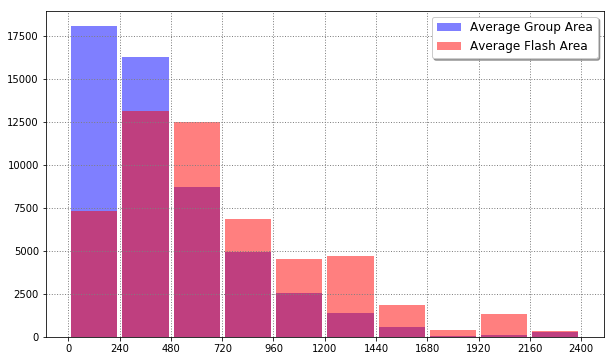

In [7]:
plt.figure(figsize=(10,6))

plt.hist(Average_group_area_flat, bins=10, range=(1,2400), histtype='barstacked', facecolor='blue', alpha=0.5, align='mid', rwidth=0.9, label='Average Group Area')
plt.hist(Average_flash_area_flat, bins=10, range=(1,2400), histtype='barstacked', facecolor='red', alpha=0.5, align='mid', rwidth=0.9, label='Average Flash Area')

plt.xticks([x * 240 for x in range(0,11)])
plt.legend(loc=0, shadow=True, fontsize='large')
plt.grid(which='major', linestyle=':', linewidth=1, color='gray', url='https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html')

plt.show()

In [8]:
data_combo = [Average_flash_area_flat[~Average_flash_area_flat.mask], Average_group_area_flat[~Average_group_area_flat.mask]]


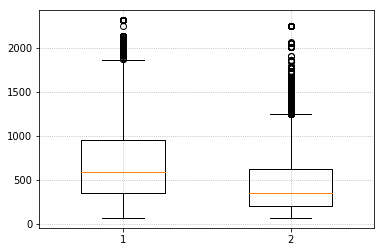

In [9]:
plt.figure()
plt.boxplot(data_combo,widths=0.5,)
plt.grid(True, linestyle=':')
plt.show()